## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline 

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x=np.linspace(0,20)

In [3]:
y=-2*x+1

Text(0, 0.5, 'y')

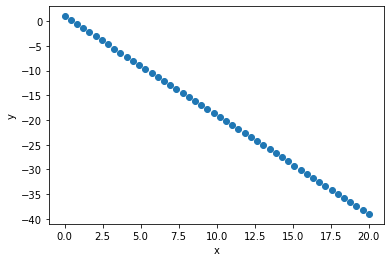

In [4]:
plt.plot(x,y,"o")
plt.xlabel("x")
plt.ylabel("y")

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
#vectorized implementation to Batch gradient Descent

def vectorized_Batch_Gradient_Descent(X,Y ,alpha=0.001,Max_number_iterations=100):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_number_iterations):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        theta_0 =theta_0 -alpha*Grad_theta_0

        theta_1= theta_1 -alpha *Grad_theta_1
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        


    return Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list
    

#### Try your function with any input parameterss of your choice.

In [6]:
Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list = vectorized_Batch_Gradient_Descent(x,y,0.001,1000)

epoch  0
Cost=  249.88775510204084
epoch  1
Cost=  186.82544901821947
epoch  2
Cost=  139.68837516021622
epoch  3
Cost=  104.45490187382671
epoch  4
Cost=  78.11898842228953
epoch  5
Cost=  58.43371572199666
epoch  6
Cost=  43.71958378928337
epoch  7
Cost=  32.72122022747044
epoch  8
Cost=  24.50027441454269
epoch  9
Cost=  18.355359342017692
epoch  10
Cost=  13.7622107059909
epoch  11
Cost=  10.328957746061088
epoch  12
Cost=  7.762689631346795
epoch  13
Cost=  5.844464905842495
epoch  14
Cost=  4.410631849965184
epoch  15
Cost=  3.3388660496390457
epoch  16
Cost=  2.537733926791354
epoch  17
Cost=  1.9388918129686958
epoch  18
Cost=  1.4912550069458361
epoch  19
Cost=  1.156639332215653
epoch  20
Cost=  0.9065033409350507
epoch  21
Cost=  0.7195132158124086
epoch  22
Cost=  0.5797226123323643
epoch  23
Cost=  0.47521214916916643
epoch  24
Cost=  0.3970724708856112
epoch  25
Cost=  0.3386441199013128
epoch  26
Cost=  0.29494936515702347
epoch  27
Cost=  0.2622675122555592
epoch  28
Co

In [7]:
print(Y_predict)

[ -0.13037674  -0.9100547   -1.68973267  -2.46941063  -3.24908859
  -4.02876656  -4.80844452  -5.58812248  -6.36780045  -7.14747841
  -7.92715637  -8.70683433  -9.4865123  -10.26619026 -11.04586822
 -11.82554619 -12.60522415 -13.38490211 -14.16458007 -14.94425804
 -15.723936   -16.50361396 -17.28329193 -18.06296989 -18.84264785
 -19.62232581 -20.40200378 -21.18168174 -21.9613597  -22.74103767
 -23.52071563 -24.30039359 -25.08007155 -25.85974952 -26.63942748
 -27.41910544 -28.19878341 -28.97846137 -29.75813933 -30.5378173
 -31.31749526 -32.09717322 -32.87685118 -33.65652915 -34.43620711
 -35.21588507 -35.99556304 -36.775241   -37.55491896 -38.33459692]


#### Calculate r2 score

In [8]:
r2_score(y,Y_predict)

0.9975950054190024

#### Plot loss vs. epochs

Text(0, 0.5, 'loss')

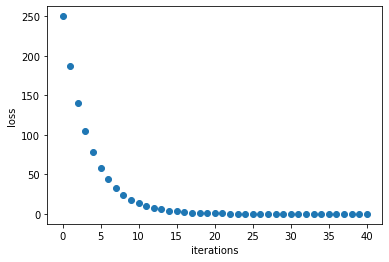

In [9]:
plt.plot(loss,"o")
plt.xlabel("iterations")
plt.ylabel("loss")


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'loss')

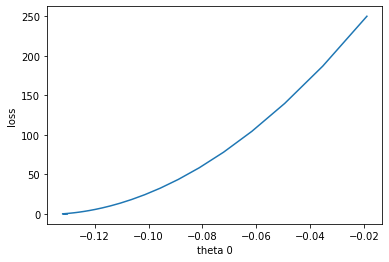

In [10]:
plt.plot(th0_list,loss)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

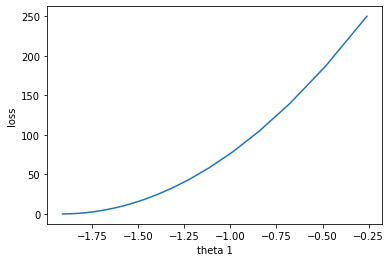

In [11]:
plt.plot(th1_list,loss)
plt.xlabel("theta 1")
plt.ylabel("loss")

#### Plot all regression lines till converge

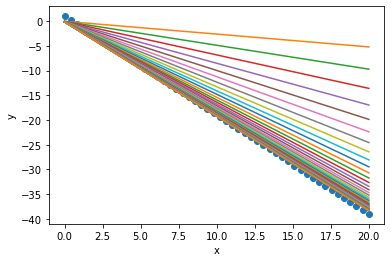

In [12]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list)):
    plt.plot(x,th0_list[i]+th1_list[i]*x)
    
    
plt.show()



#### Plot the best regression line

Text(0, 0.5, 'y')

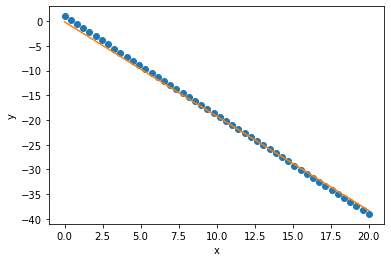

In [13]:
plt.plot(x,y,"o")
plt.plot(x,Y_predict)
plt.xlabel("x")
plt.ylabel("y")

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [14]:
Y_hat , th_0 ,th_1 , l,ths0,ths1 = vectorized_Batch_Gradient_Descent(x,y,0.01,100)

epoch  0
Cost=  249.88775510204084
epoch  1
Cost=  31.527821438771234
epoch  2
Cost=  4.104740105830764
epoch  3
Cost=  0.6601186550646106
epoch  4
Cost=  0.22679212340254964
epoch  5
Cost=  0.1716373537320427
epoch  6
Cost=  0.16397836159451523
epoch  7
Cost=  0.16228778783493517
epoch  8
Cost=  0.16135047568290037


Text(0, 0.5, 'loss')

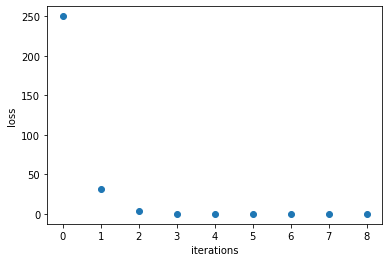

In [15]:
plt.plot(l,"o")
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

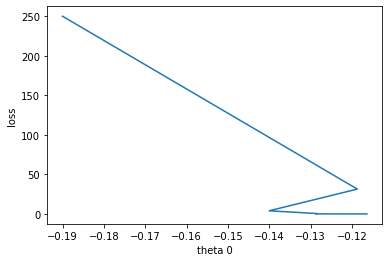

In [16]:
plt.plot(ths0,l)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

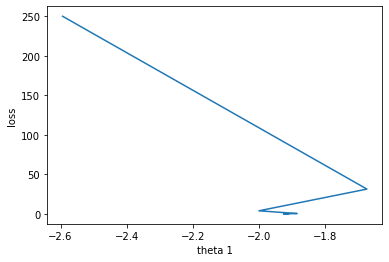

In [17]:
plt.plot(ths1,l)
plt.xlabel("theta 1")
plt.ylabel("loss")

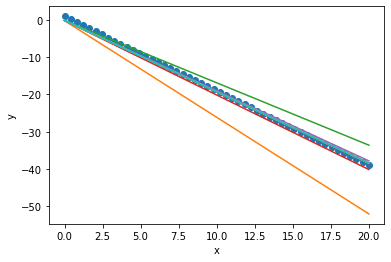

In [18]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(ths0)):
    plt.plot(x,ths0[i]+ths1[i]*x)
    
    
plt.show()

Text(0, 0.5, 'y')

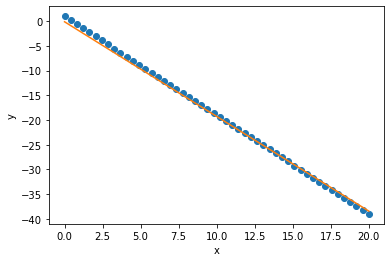

In [19]:
plt.plot(x,y,"o")
plt.plot(x,Y_hat)
plt.xlabel("x")
plt.ylabel("y")

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [20]:
x_mini=np.linspace(0,20)
y_mini=-2*x_mini+1

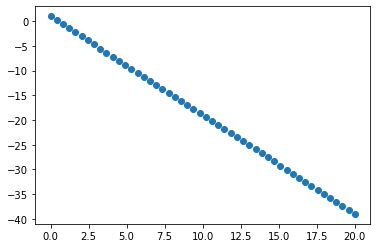

In [21]:
plt.plot(x_mini,y_mini,"o")

In [22]:

def make_batches(batch_size):
    x_batchs=[]
    y_batchs=[]
    for i in range (len(x_mini)//batch_size):
        x_batchs.append(x_mini[i*batch_size: (i+1)*batch_size])
        y_batchs.append(y_mini[i*batch_size: (i+1)*batch_size])
    return x_batchs,y_batchs

In [23]:
#assume the batch size is 5 so we will have 10 batchs

def MiniBatch_GD(X,Y,alpha,Max_no_iterations ,batch_size):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
    x_batchs=[]
    y_batchs=[]
    
    x_batchs,y_batchs=make_batches(batch_size)
    for e in range (Max_no_iterations):
        print("================================================")
        print("epoch " ,e)
        
        
        for i in range (len(x_batchs)):
            
            #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
    
            Y_predict=theta_0 +theta_1 *x_batchs[i]
            
            #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
            
            error=Y_predict - y_batchs[i]
            cost=np.dot(error,error)/(2*batch_size)
            loss.append(cost)
            
            #4.  Calculate gradient of theta_0 and theta_1
            Grad_theta_0=error.sum()/batch_size
            Grad_theta_1=np.dot(error ,x_batchs[i])/batch_size
            
            #5. Update the parameters (simultaneously).
            theta_0 =theta_0 -alpha*Grad_theta_0

            theta_1= theta_1 -alpha *Grad_theta_1
            th0_list.append(theta_0)
            th1_list.append(theta_1)
    
        print("Cost= " , cost)
        Y_predict_list.append(Y_predict)
        
       
        #stop condition 
        if(e!=0):
            if abs(prev_cost - cost)<0.0001:
                break
        prev_cost=cost



    return Y_predict_list , theta_0 ,theta_1 , loss,th0_list,th1_list
    


In [24]:
y_predicted , th_0 ,th_1 ,cost,list_th0 ,list_th1 =MiniBatch_GD(x_mini,y_mini, 0.00001, 100,5)

epoch  0
Cost=  685.4228673440324
epoch  1
Cost=  667.3233966251709
epoch  2
Cost=  649.7050055882341
epoch  3
Cost=  632.5548654577512
epoch  4
Cost=  615.8604901261114
epoch  5
Cost=  599.6097269929198
epoch  6
Cost=  583.7907480493502
epoch  7
Cost=  568.3920412009445
epoch  8
Cost=  553.4024018224752
epoch  9
Cost=  538.8109245386682
epoch  10
Cost=  524.606995224741
epoch  11
Cost=  510.7802832208778
epoch  12
Cost=  497.3207337549167
epoch  13
Cost=  484.21856056768354
epoch  14
Cost=  471.46423873554556
epoch  15
Cost=  459.04849768491476
epoch  16
Cost=  446.96231439356325
epoch  17
Cost=  435.1969067737552
epoch  18
Cost=  423.74372723233
epoch  19
Cost=  412.59445640300555
epoch  20
Cost=  401.7409970462924
epoch  21
Cost=  391.1754681125391
epoch  22
Cost=  380.890198963739
epoch  23
Cost=  370.87772374985934
epoch  24
Cost=  361.1307759355533
epoch  25
Cost=  351.6422829732347
epoch  26
Cost=  342.4053611186018
epoch  27
Cost=  333.4133103847961
epoch  28
Cost=  324.6596096

In [25]:
r2_score(y_mini ,th_0+th_1*x_mini )

0.7587177527588016

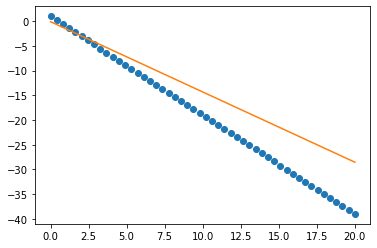

In [26]:
plt.plot(x_mini,y_mini,"o")
plt.plot(x_mini ,th_0+th_1*x_mini)

Text(0, 0.5, 'loss')

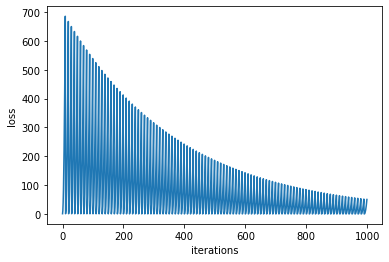

In [27]:
#plot loss vs iterations
plt.plot(np.arange(len(cost)),cost)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

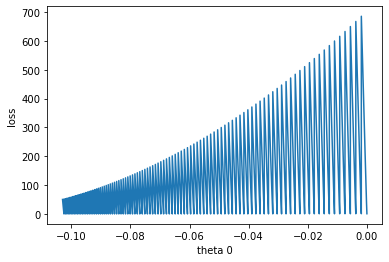

In [28]:
plt.plot(list_th0,cost)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

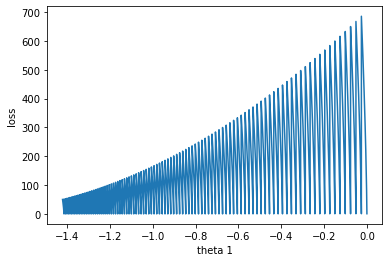

In [29]:
plt.plot(list_th1,cost)
plt.xlabel("theta 1")
plt.ylabel("loss")

## change batch size 

In [30]:
y_pre , th0 ,th1 ,costs,listth0 ,listth1 =MiniBatch_GD(x_mini,y_mini, 0.001, 1000,10)

epoch  0
Cost=  301.7839801873339
epoch  1
Cost=  66.16162440398764
epoch  2
Cost=  15.151683273060595
epoch  3
Cost=  3.783812406011888
epoch  4
Cost=  1.1053623165547433
epoch  5
Cost=  0.41129110232756166
epoch  6
Cost=  0.2055245073312953
epoch  7
Cost=  0.13478925599730024
epoch  8
Cost=  0.10723620714226893
epoch  9
Cost=  0.09553464953816514
epoch  10
Cost=  0.09026929054216763
epoch  11
Cost=  0.08777993732723559
epoch  12
Cost=  0.08652678313733697
epoch  13
Cost=  0.08583297900571987
epoch  14
Cost=  0.08539432531013849
epoch  15
Cost=  0.0850726351241043
epoch  16
Cost=  0.08480481883123787
epoch  17
Cost=  0.08456200504593446
epoch  18
Cost=  0.08433096682556379
epoch  19
Cost=  0.0841056410165344
epoch  20
Cost=  0.083883247226051
epoch  21
Cost=  0.08366250986694038
epoch  22
Cost=  0.08344284325613958
epoch  23
Cost=  0.08322397803243367
epoch  24
Cost=  0.08300578987438952
epoch  25
Cost=  0.08278822096630259
epoch  26
Cost=  0.08257124398899689
epoch  27
Cost=  0.08235

epoch  170
Cost=  0.056587779100123435
epoch  171
Cost=  0.0564394826105211
epoch  172
Cost=  0.056291574753401206
epoch  173
Cost=  0.05614405451028952
epoch  174
Cost=  0.055996920865388086
epoch  175
Cost=  0.05585017280556122
epoch  176
Cost=  0.055703809320329215
epoch  177
Cost=  0.05555782940185814
epoch  178
Cost=  0.0554122320449512
epoch  179
Cost=  0.05526701624705528
epoch  180
Cost=  0.05512218100823749
epoch  181
Cost=  0.054977725331187166
epoch  182
Cost=  0.05483364822121019
epoch  183
Cost=  0.05468994868621189
epoch  184
Cost=  0.05454662573670597
epoch  185
Cost=  0.054403678385795386
epoch  186
Cost=  0.05426110564916899
epoch  187
Cost=  0.05411890654509257
epoch  188
Cost=  0.053977080094413085
epoch  189
Cost=  0.05383562532053231
epoch  190
Cost=  0.05369454124942389
epoch  191
Cost=  0.05355382690960303
epoch  192
Cost=  0.05341348133213587
epoch  193
Cost=  0.05327350355062706
epoch  194
Cost=  0.053133892601216835
epoch  195
Cost=  0.05299464752256354
epoch 

epoch  268
Cost=  0.043756173375177995
epoch  269
Cost=  0.04364150397105707
epoch  270
Cost=  0.04352713507475668
epoch  271
Cost=  0.043413065898750235
epoch  272
Cost=  0.04329929565758037
epoch  273
Cost=  0.0431858235678408
epoch  274
Cost=  0.0430726488481818
epoch  275
Cost=  0.04295977071930959
epoch  276
Cost=  0.04284718840395725
epoch  277
Cost=  0.04273490112690442
epoch  278
Cost=  0.04262290811496273
epoch  279
Cost=  0.04251120859696418
epoch  280
Cost=  0.042399801803769045
epoch  281
Cost=  0.04228868696824766
epoch  282
Cost=  0.04217786332528198
epoch  283
Cost=  0.042067330111760504
epoch  284
Cost=  0.041957086566572085
epoch  285
Cost=  0.04184713193059397
epoch  286
Cost=  0.04173746544670158
epoch  287
Cost=  0.041628086359747955
epoch  288
Cost=  0.04151899391657386
epoch  289
Cost=  0.04141018736598057
epoch  290
Cost=  0.04130166595874786
epoch  291
Cost=  0.0411934289476178
epoch  292
Cost=  0.04108547558728509
epoch  293
Cost=  0.0409778051344065
epoch  294

In [31]:
r2_score(y_mini ,th0+th1*x_mini )

0.998926947495355

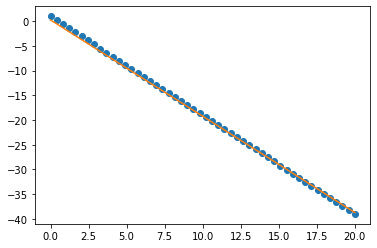

In [32]:
plt.plot(x_mini,y_mini,"o")
plt.plot(x_mini ,th0+th1*x_mini)

Text(0, 0.5, 'loss')

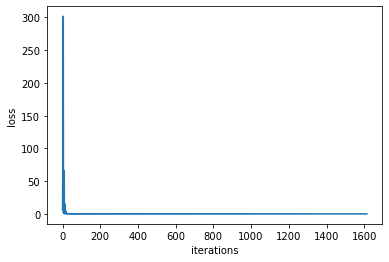

In [33]:
#plot loss vs iterations
plt.plot(np.arange(len(costs)),costs)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

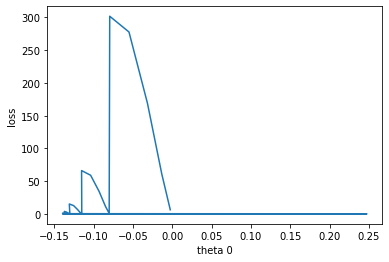

In [34]:
plt.plot(listth0,costs)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

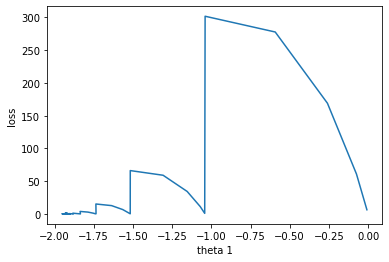

In [35]:
plt.plot(listth1,costs)
plt.xlabel("theta 1")
plt.ylabel("loss")

### With shuffle 

In [36]:
x_mini_shuffled=np.linspace(0,20)


In [37]:
np.random.shuffle(x_mini_shuffled)
y_mini_shuffled=-2*x_mini_shuffled+1



In [38]:
yPredicted , th0_shuffled ,th1_shuffled ,costs_list,list_th0_shuffled ,list_th1_shuffled =MiniBatch_GD(x_mini_shuffled,y_mini_shuffled, 0.001, 1000,5)

epoch  0
Cost=  81.30839618948308
epoch  1
Cost=  4.480078456753001
epoch  2
Cost=  0.44770107158015016
epoch  3
Cost=  0.13340408677246263
epoch  4
Cost=  0.09061752412837978
epoch  5
Cost=  0.08236033725356338
epoch  6
Cost=  0.08034832206788395
epoch  7
Cost=  0.07960130778310306
epoch  8
Cost=  0.07911871732564253
epoch  9
Cost=  0.07869305251184583
epoch  10
Cost=  0.07828097970878897
epoch  11
Cost=  0.07787342911297122
epoch  12
Cost=  0.07746849492733375
epoch  13
Cost=  0.07706576982041893
epoch  14
Cost=  0.0766651599486202
epoch  15
Cost=  0.07626663708836609
epoch  16
Cost=  0.07587018678714372
epoch  17
Cost=  0.07547579751751714
epoch  18
Cost=  0.07508345840812632
epoch  19
Cost=  0.07469315876881652
epoch  20
Cost=  0.07430488799109478
epoch  21
Cost=  0.07391863552706396
epoch  22
Cost=  0.07353439088480482
epoch  23
Cost=  0.07315214362717573
epoch  24
Cost=  0.07277188337133232
epoch  25
Cost=  0.0723935997884265
epoch  26
Cost=  0.07201728260328578
epoch  27
Cost=  

Cost=  0.04232194514431889
epoch  129
Cost=  0.042101946756161426
epoch  130
Cost=  0.04188309196597915
epoch  131
Cost=  0.041665374829110424
epoch  132
Cost=  0.041448789431790325
epoch  133
Cost=  0.041233329891002514
epoch  134
Cost=  0.041018990354304674
epoch  135
Cost=  0.04080576499968057
epoch  136
Cost=  0.0405936480353756
epoch  137
Cost=  0.04038263369974575
epoch  138
Cost=  0.040172716261094414
epoch  139
Cost=  0.03996389001751729
epoch  140
Cost=  0.039756149296753585
epoch  141
Cost=  0.03954948845602875
epoch  142
Cost=  0.03934390188189851
epoch  143
Cost=  0.03913938399009809
epoch  144
Cost=  0.03893592922538982
epoch  145
Cost=  0.03873353206141713
epoch  146
Cost=  0.03853218700054967
epoch  147
Cost=  0.03833188857373117
epoch  148
Cost=  0.038132631340337675
epoch  149
Cost=  0.03793440988802814
epoch  150
Cost=  0.03773721883259544
epoch  151
Cost=  0.037541052817813336
epoch  152
Cost=  0.03734590651531157
epoch  153
Cost=  0.03715177462440548
epoch  154
Cost

In [39]:
r2_score(y_mini_shuffled ,th0_shuffled+th1_shuffled*x_mini_shuffled )

0.9993883589393641

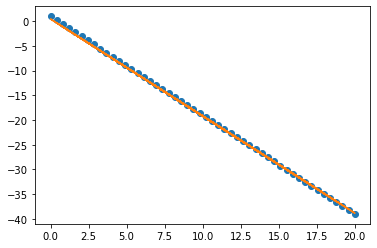

In [40]:
plt.plot(x_mini_shuffled,y_mini_shuffled,"o")
plt.plot(x_mini_shuffled ,th0_shuffled+th1_shuffled*x_mini_shuffled)

Text(0, 0.5, 'loss')

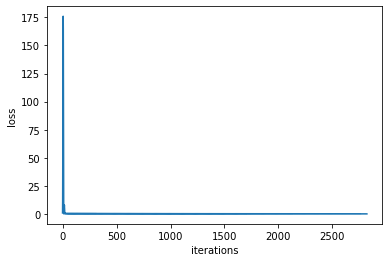

In [41]:
#plot loss vs iterations
plt.plot(np.arange(len(costs_list)),costs_list)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

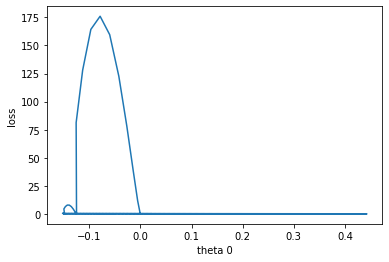

In [42]:
plt.plot(list_th0_shuffled,costs_list)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

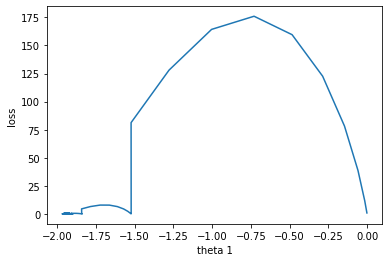

In [43]:
plt.plot(list_th1_shuffled,costs_list)
plt.xlabel("theta 1")
plt.ylabel("loss")

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [44]:
def stochastic_GD(X,Y,alpha,Max_no_iterations):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
    
    for e in range (Max_no_iterations):
        print("================================================")
        print("epoch " ,e)
        
        for i in range (len(X)):
            
            #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
    
            Y_predict=theta_0 +theta_1 *X[i]
            
            #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
            error=Y_predict - Y[i]
            cost=(error**2)/(2)
            loss.append(cost)
            
            #4.  Calculate gradient of theta_0 and theta_1
            Grad_theta_0=error
            Grad_theta_1=error *X[i]
            
            #5. Update the parameters (simultaneously).
            theta_0 =theta_0 -alpha*Grad_theta_0

            theta_1= theta_1 -alpha *Grad_theta_1
            th0_list.append(theta_0)
            th1_list.append(theta_1)
    
        print("Cost= " , cost)
        Y_predict_list.append(Y_predict)
                 
        #stop condition 
        if(e!=0):
            if (abs(loss[(e-1)*len(X)]-loss[e*len(X)])<0.00001):
                break



    return Y_predict_list , theta_0 ,theta_1 , loss,th0_list,th1_list
    

In [45]:
Y_predict , t0 ,t1 , losses,t0_list,t1_list=stochastic_GD(x,y,0.0001,1000)

epoch  0
Cost=  214.21025742604553
epoch  1
Cost=  56.7938200533083
epoch  2
Cost=  15.677071402920276
epoch  3
Cost=  4.654473192446179
epoch  4
Cost=  1.5611177939281917
epoch  5
Cost=  0.6270143422833283
epoch  6
Cost=  0.3148492489424965
epoch  7
Cost=  0.19773713423840764
epoch  8
Cost=  0.1488516737967059
epoch  9
Cost=  0.12670266492811683
epoch  10
Cost=  0.11607942026783916
epoch  11
Cost=  0.11076649687977878
epoch  12
Cost=  0.1080015617472198
epoch  13
Cost=  0.10648741183802726
epoch  14
Cost=  0.10559489856022879
epoch  15
Cost=  0.10501345089547301
epoch  16
Cost=  0.10458832938558035
epoch  17
Cost=  0.10424206616042035
epoch  18
Cost=  0.10393578296502931
epoch  19
Cost=  0.103649943647125
epoch  20
Cost=  0.10337472479888951
epoch  21
Cost=  0.10310518490387274
epoch  22
Cost=  0.10283883738386929
epoch  23
Cost=  0.10257443046319194
epoch  24
Cost=  0.10231133353219925
epoch  25
Cost=  0.10204922847830541
epoch  26
Cost=  0.10178795440629972
epoch  27
Cost=  0.101527

Cost=  0.07858115262768403
epoch  128
Cost=  0.0783800882898272
epoch  129
Cost=  0.0781795384120693
epoch  130
Cost=  0.07797950167807462
epoch  131
Cost=  0.07777997677487594
epoch  132
Cost=  0.07758096239284974
epoch  133
Cost=  0.07738245722574165
epoch  134
Cost=  0.07718445997063046
epoch  135
Cost=  0.07698696932792573
epoch  136
Cost=  0.07678998400137092
epoch  137
Cost=  0.07659350269801592
epoch  138
Cost=  0.07639752412822301
epoch  139
Cost=  0.07620204700566727
epoch  140
Cost=  0.0760070700472925
epoch  141
Cost=  0.07581259197335055
epoch  142
Cost=  0.07561861150734078
epoch  143
Cost=  0.07542512737604651
epoch  144
Cost=  0.07523213830950226
epoch  145
Cost=  0.07503964304099152
epoch  146
Cost=  0.07484764030703889
epoch  147
Cost=  0.07465612884741613
epoch  148
Cost=  0.07446510740509854
epoch  149
Cost=  0.07427457472628764
epoch  150
Cost=  0.07408452956040046
epoch  151
Cost=  0.07389497066003466
epoch  152
Cost=  0.07370589678099633
epoch  153
Cost=  0.073517

Cost=  0.040887782854918155
epoch  383
Cost=  0.040783163939171856
epoch  384
Cost=  0.04067881271016979
epoch  385
Cost=  0.0405747284829896
epoch  386
Cost=  0.04047091057444909
epoch  387
Cost=  0.04036735830313242
epoch  388
Cost=  0.040264070989357546
epoch  389
Cost=  0.04016104795517814
epoch  390
Cost=  0.0400582885243875
epoch  391
Cost=  0.03995579202250831
epoch  392
Cost=  0.03985355777679051
epoch  393
Cost=  0.03975158511620514
epoch  394
Cost=  0.03964987337143023
epoch  395
Cost=  0.039548421874868664
epoch  396
Cost=  0.03944722996062611
epoch  397
Cost=  0.03934629696451686
epoch  398
Cost=  0.03924562222404979
epoch  399
Cost=  0.039145205078430285
epoch  400
Cost=  0.03904504486855611
epoch  401
Cost=  0.03894514093700747
epoch  402
Cost=  0.038845492628050836
epoch  403
Cost=  0.03874609928762507
epoch  404
Cost=  0.03864696026334922
epoch  405
Cost=  0.038548074904512564
epoch  406
Cost=  0.03844944256206078
epoch  407
Cost=  0.03835106258859983
epoch  408
Cost=  

Cost=  0.02699882375942629
epoch  545
Cost=  0.026929742301080858
epoch  546
Cost=  0.026860837600357037
epoch  547
Cost=  0.026792109204984038
epoch  548
Cost=  0.026723556663860063
epoch  549
Cost=  0.0266551795270265
epoch  550
Cost=  0.026586977345676686
epoch  551
Cost=  0.026518949672161334
epoch  552
Cost=  0.02645109605996119
epoch  553
Cost=  0.02638341606371377
epoch  554
Cost=  0.02631590923918771
epoch  555
Cost=  0.026248575143294737
epoch  556
Cost=  0.026181413334077135
epoch  557
Cost=  0.026114423370705055
epoch  558
Cost=  0.02604760481348031
epoch  559
Cost=  0.02598095722383201
epoch  560
Cost=  0.02591448016430417
epoch  561
Cost=  0.025848173198561107
epoch  562
Cost=  0.025782035891391233
epoch  563
Cost=  0.025716067808691415
epoch  564
Cost=  0.025650268517470785
epoch  565
Cost=  0.025584637585843246
epoch  566
Cost=  0.025519174583029627
epoch  567
Cost=  0.025453879079355052
epoch  568
Cost=  0.02538875064623986
epoch  569
Cost=  0.025323788856204975
epoch  

epoch  643
Cost=  0.020950425597196547
epoch  644
Cost=  0.020896820078444966
epoch  645
Cost=  0.020843351719279236
epoch  646
Cost=  0.020790020168745146
epoch  647
Cost=  0.020736825076797517
epoch  648
Cost=  0.020683766094284975
epoch  649
Cost=  0.02063084287293772
epoch  650
Cost=  0.020578055065392814
epoch  651
Cost=  0.020525402325166073
epoch  652
Cost=  0.020472884306660027
epoch  653
Cost=  0.020420500665170423
epoch  654
Cost=  0.02036825105686541
epoch  655
Cost=  0.020316135138794912
epoch  656
Cost=  0.020264152568894276
epoch  657
Cost=  0.020212303005959206
epoch  658
Cost=  0.020160586109673757
epoch  659
Cost=  0.020109001540582476
epoch  660
Cost=  0.020057548960102617
epoch  661
Cost=  0.020006228030516333
epoch  662
Cost=  0.019955038414975732
epoch  663
Cost=  0.0199039797774823
epoch  664
Cost=  0.019853051782906174
epoch  665
Cost=  0.019802254096975544
epoch  666
Cost=  0.019751586386271742
epoch  667
Cost=  0.019701048318228637
epoch  668
Cost=  0.019650639

Cost=  0.01588645650819823
epoch  752
Cost=  0.015845808086130057
epoch  753
Cost=  0.015805263670527377
epoch  754
Cost=  0.0157648229952729
epoch  755
Cost=  0.015724485794923474
epoch  756
Cost=  0.01568425180472862
epoch  757
Cost=  0.015644120760598654
epoch  758
Cost=  0.01560409239912828
epoch  759
Cost=  0.015564166457583618
epoch  760
Cost=  0.015524342673909374
epoch  761
Cost=  0.015484620786713437
epoch  762
Cost=  0.015445000535275297
epoch  763
Cost=  0.015405481659539446
epoch  764
Cost=  0.015366063900120006
epoch  765
Cost=  0.01532674699828792
epoch  766
Cost=  0.015287530695986788
epoch  767
Cost=  0.015248414735810128
epoch  768
Cost=  0.015209398861013478
epoch  769
Cost=  0.015170482815512802
epoch  770
Cost=  0.015131666343874233
epoch  771
Cost=  0.015092949191321184
epoch  772
Cost=  0.01505433110372658
epoch  773
Cost=  0.01501581182761501
epoch  774
Cost=  0.014977391110157468
epoch  775
Cost=  0.014939068699177181
epoch  776
Cost=  0.014900844343134524
epoch

epoch  877
Cost=  0.011503595205687788
epoch  878
Cost=  0.011474161140703001
epoch  879
Cost=  0.0114448023881907
epoch  880
Cost=  0.011415518755446122
epoch  881
Cost=  0.01138631005026474
epoch  882
Cost=  0.011357176080929243
epoch  883
Cost=  0.01132811665621695
epoch  884
Cost=  0.011299131585387921
epoch  885
Cost=  0.011270220678197697
epoch  886
Cost=  0.011241383744881157
epoch  887
Cost=  0.011212620596165245
epoch  888
Cost=  0.011183931043258183
epoch  889
Cost=  0.011155314897851522
epoch  890
Cost=  0.011126771972117921
epoch  891
Cost=  0.01109830207871105
epoch  892
Cost=  0.011069905030765497
epoch  893
Cost=  0.011041580641893489
epoch  894
Cost=  0.011013328726179536
epoch  895
Cost=  0.010985149098190898
epoch  896
Cost=  0.010957041572964829
epoch  897
Cost=  0.010929005966016925
epoch  898
Cost=  0.010901042093324214
epoch  899
Cost=  0.010873149771347144
epoch  900
Cost=  0.010845328817008492
epoch  901
Cost=  0.0108175790476996
epoch  902
Cost=  0.010789900281

epoch  974
Cost=  0.008972364117708754
epoch  975
Cost=  0.008949406673204834
epoch  976
Cost=  0.00892650796955043
epoch  977
Cost=  0.00890366785644092
epoch  978
Cost=  0.008880886183964204
epoch  979
Cost=  0.008858162802587426
epoch  980
Cost=  0.008835497563162705
epoch  981
Cost=  0.008812890316924305
epoch  982
Cost=  0.008790340915484899
epoch  983
Cost=  0.008767849210838426
epoch  984
Cost=  0.008745415055354476
epoch  985
Cost=  0.00872303830178772
epoch  986
Cost=  0.00870071880326103
epoch  987
Cost=  0.008678456413279599
epoch  988
Cost=  0.008656250985716915
epoch  989
Cost=  0.008634102374827906
epoch  990
Cost=  0.008612010435235873
epoch  991
Cost=  0.008589975021934421
epoch  992
Cost=  0.008567995990292149
epoch  993
Cost=  0.008546073196048031
epoch  994
Cost=  0.008524206495306809
epoch  995
Cost=  0.008502395744540902
epoch  996
Cost=  0.008480640800595093
epoch  997
Cost=  0.008458941520677282
epoch  998
Cost=  0.008437297762359486
epoch  999
Cost=  0.008415709

Text(0, 0.5, 'loss')

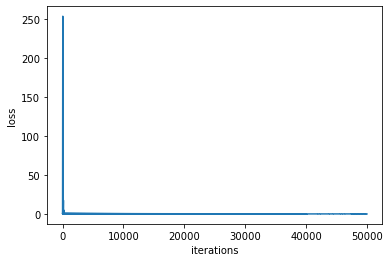

In [46]:
#plot loss vs iterations
plt.plot(losses)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

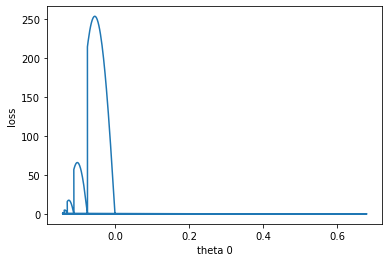

In [47]:
plt.plot(t0_list,losses)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

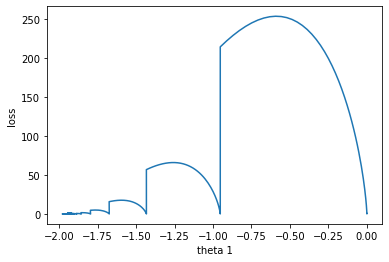

In [48]:
plt.plot(t1_list,losses)
plt.xlabel("theta 1")
plt.ylabel("loss")

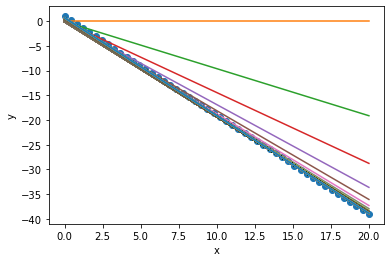

In [49]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(Y_predict)):
    plt.plot(x,t0_list[i*(len(x))]+t1_list[i*(len(x))]*x)
    
    
plt.show()


Text(0, 0.5, 'y')

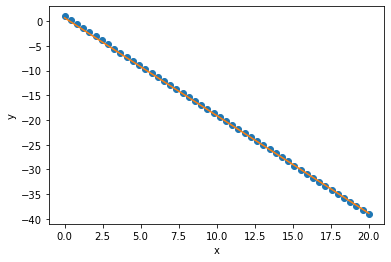

In [50]:
plt.plot(x,y,"o")
plt.plot(x,t0+t1*x)
plt.xlabel("x")
plt.ylabel("y")

In [51]:
r2_score(y,t0+t1*x)

0.99980739516946

## Try with shuffle

In [52]:
x_new=np.linspace(0,20)


In [53]:
np.random.shuffle(x_new)
y_new=-2*x_new+1

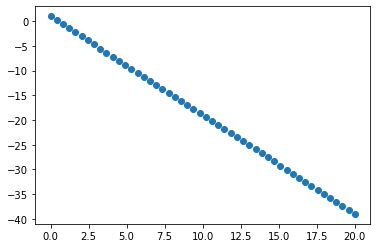

In [54]:
plt.scatter(x_new,y_new)

In [55]:
y_hat , t_0 ,t_1 , loss_list,t0List,t1List=stochastic_GD(x_new,y_new,0.001,1000)

epoch  0
Cost=  0.1749343431527494
epoch  1
Cost=  0.17394915720189433
epoch  2
Cost=  0.16947366673949554
epoch  3
Cost=  0.1651119576035185
epoch  4
Cost=  0.16086250434136637
epoch  5
Cost=  0.1567224184033856
epoch  6
Cost=  0.15268888502495764
epoch  7
Cost=  0.14875916188427887
epoch  8
Cost=  0.1449305772381252
epoch  9
Cost=  0.14120052810539727
epoch  10
Cost=  0.13756647849739023
epoch  11
Cost=  0.13402595769363468
epoch  12
Cost=  0.13057655856209757
epoch  13
Cost=  0.12721593592261948
epoch  14
Cost=  0.12394180495246634
epoch  15
Cost=  0.1207519396329322
epoch  16
Cost=  0.11764417123590751
epoch  17
Cost=  0.11461638684940124
epoch  18
Cost=  0.11166652794101023
epoch  19
Cost=  0.10879258895837043
epoch  20
Cost=  0.10599261596561205
epoch  21
Cost=  0.10326470531492422
epoch  22
Cost=  0.10060700235229446
epoch  23
Cost=  0.0980177001565675
epoch  24
Cost=  0.09549503831095582
epoch  25
Cost=  0.09303730170616452
epoch  26
Cost=  0.09064281937432016
epoch  27
Cost=  

Cost=  0.004639076145331147
epoch  141
Cost=  0.004519681175116227
epoch  142
Cost=  0.004403359049249244
epoch  143
Cost=  0.004290030682553091
epoch  144
Cost=  0.0041796190252493546
epoch  145
Cost=  0.00407204901057492
epoch  146
Cost=  0.003967247503744768
epoch  147
Cost=  0.0038651432522288746
epoch  148
Cost=  0.003765666837309528
epoch  149
Cost=  0.0036687506268844377
epoch  150
Cost=  0.003574328729484861
epoch  151
Cost=  0.003482336949478365
epoch  152
Cost=  0.00339271274342202
epoch  153
Cost=  0.00330539517754077
epoch  154
Cost=  0.003220324886300057
epoch  155
Cost=  0.003137444032044543
epoch  156
Cost=  0.0030566962656742363
epoch  157
Cost=  0.002978026688335654
epoch  158
Cost=  0.0029013818140947874
epoch  159
Cost=  0.002826709533575254
epoch  160
Cost=  0.0027539590785289757
epoch  161
Cost=  0.002683080987320109
epoch  162
Cost=  0.0026140270712969324
epoch  163
Cost=  0.002546750382029332
epoch  164
Cost=  0.0024812051793895494
epoch  165
Cost=  0.00241734690

Text(0, 0.5, 'loss')

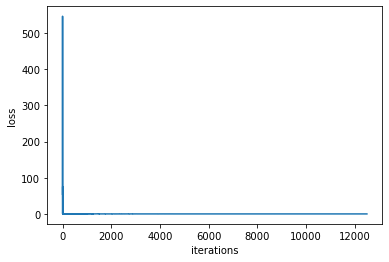

In [56]:
#plot loss vs iterations
plt.plot(loss_list)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

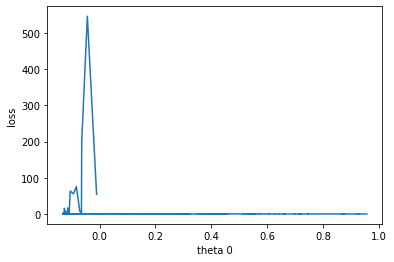

In [57]:
plt.plot(t0List,loss_list)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

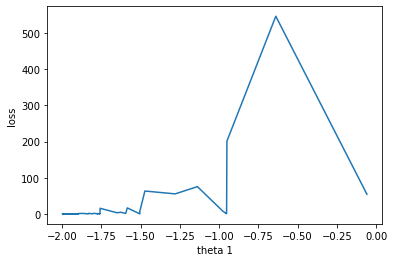

In [58]:
plt.plot(t1List,loss_list)
plt.xlabel("theta 1")
plt.ylabel("loss")

Text(0, 0.5, 'y')

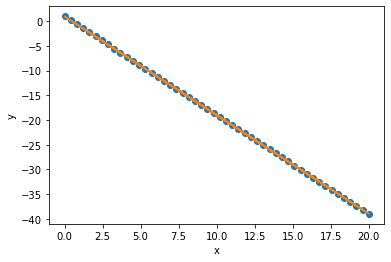

In [59]:
plt.plot(x_new,y_new,"o")
plt.plot(x_new,t_0+t_1*x_new)
plt.xlabel("x")
plt.ylabel("y")

In [60]:
r2_score(y_new,t_0+t_1*x_new)

0.9999963410340026